# Regression- Boston House Price

- Ref 23_1005

# Simple Linear Regression

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings("ignore")
import seaborn as sns

### Load Data

In [2]:
# Built-in-Dataset by sklearn
from sklearn.datasets import load_boston
data = load_boston()

In [3]:
# Reading Data Description- Basic Description about Dataset
print(data.DESCR)   

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- In real life also need to understand the data description, what try to find out by research
- instance: observations/row
- No of Attributes: It is features/ columns (which contain numeric & chategorial values)
- Median value: This is target variable (House Price) that mean which to predict
- From the Attribute: our target is "MEDV"

# Data Pre-Processing

### Data Extraction

##### Feature Name Extraction

In [4]:
# Column Name
data.feature_names  # return list type of object, in numpy array which is iterable

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# Culumn Values/ features
data.data  # its kind of numpy array, so it is possible to convert into dataframe

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
# data convert to dataframe 
df = pd.DataFrame(data.data)  # it takes default index value, need to pass column name over it 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Column name assign over default index values:
df.columns  # col attributes, kind of range fn, o-no of cols

RangeIndex(start=0, stop=13, step=1)

In [8]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names  # Column name conversion, now add target into id
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- Make sure feature_names data are in order

In [9]:
# add target in dataframe
# Data Type conversion for optimization
df = pd.DataFrame(data.data, dtype=np.float16) # only 5 digti after decimal in 0 index, so float16 is enough, float32 if > 5 digit
df['MEDV'] = data.target  # Targed added in df
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,MEDV
0,0.006321,18.0,2.310547,0.0,0.538086,6.574219,65.18750,4.089844,1.0,296.0,15.296875,397.00,4.980469,24.0
1,0.027313,0.0,7.070312,0.0,0.468994,6.421875,78.87500,4.968750,2.0,242.0,17.796875,397.00,9.140625,21.6
2,0.027283,0.0,7.070312,0.0,0.468994,7.183594,61.09375,4.968750,2.0,242.0,17.796875,392.75,4.031250,34.7
3,0.032379,0.0,2.179688,0.0,0.458008,6.996094,45.81250,6.062500,3.0,222.0,18.703125,394.75,2.939453,33.4
4,0.069031,0.0,2.179688,0.0,0.458008,7.148438,54.18750,6.062500,3.0,222.0,18.703125,397.00,5.328125,36.2


In [10]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['MEDV'] = data.target.astype(np.float64)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

In [11]:
# Understanding Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# Make Generalized Types
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['MEDV'] = data.target  # added target in df
df = df.astype(dtype=np.float32)  
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


In [13]:
# Check & verify all types are common now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float32
 1   ZN       506 non-null    float32
 2   INDUS    506 non-null    float32
 3   CHAS     506 non-null    float32
 4   NOX      506 non-null    float32
 5   RM       506 non-null    float32
 6   AGE      506 non-null    float32
 7   DIS      506 non-null    float32
 8   RAD      506 non-null    float32
 9   TAX      506 non-null    float32
 10  PTRATIO  506 non-null    float32
 11  B        506 non-null    float32
 12  LSTAT    506 non-null    float32
 13  MEDV     506 non-null    float32
dtypes: float32(14)
memory usage: 27.8 KB


In [14]:
# Basic Stats Idea
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


In [15]:
# Access Specic Cols
df.B

0      396.899994
1      396.899994
2      392.829987
3      394.630005
4      396.899994
          ...    
501    391.989990
502    396.899994
503    396.899994
504    393.450012
505    396.899994
Name: B, Length: 506, dtype: float32

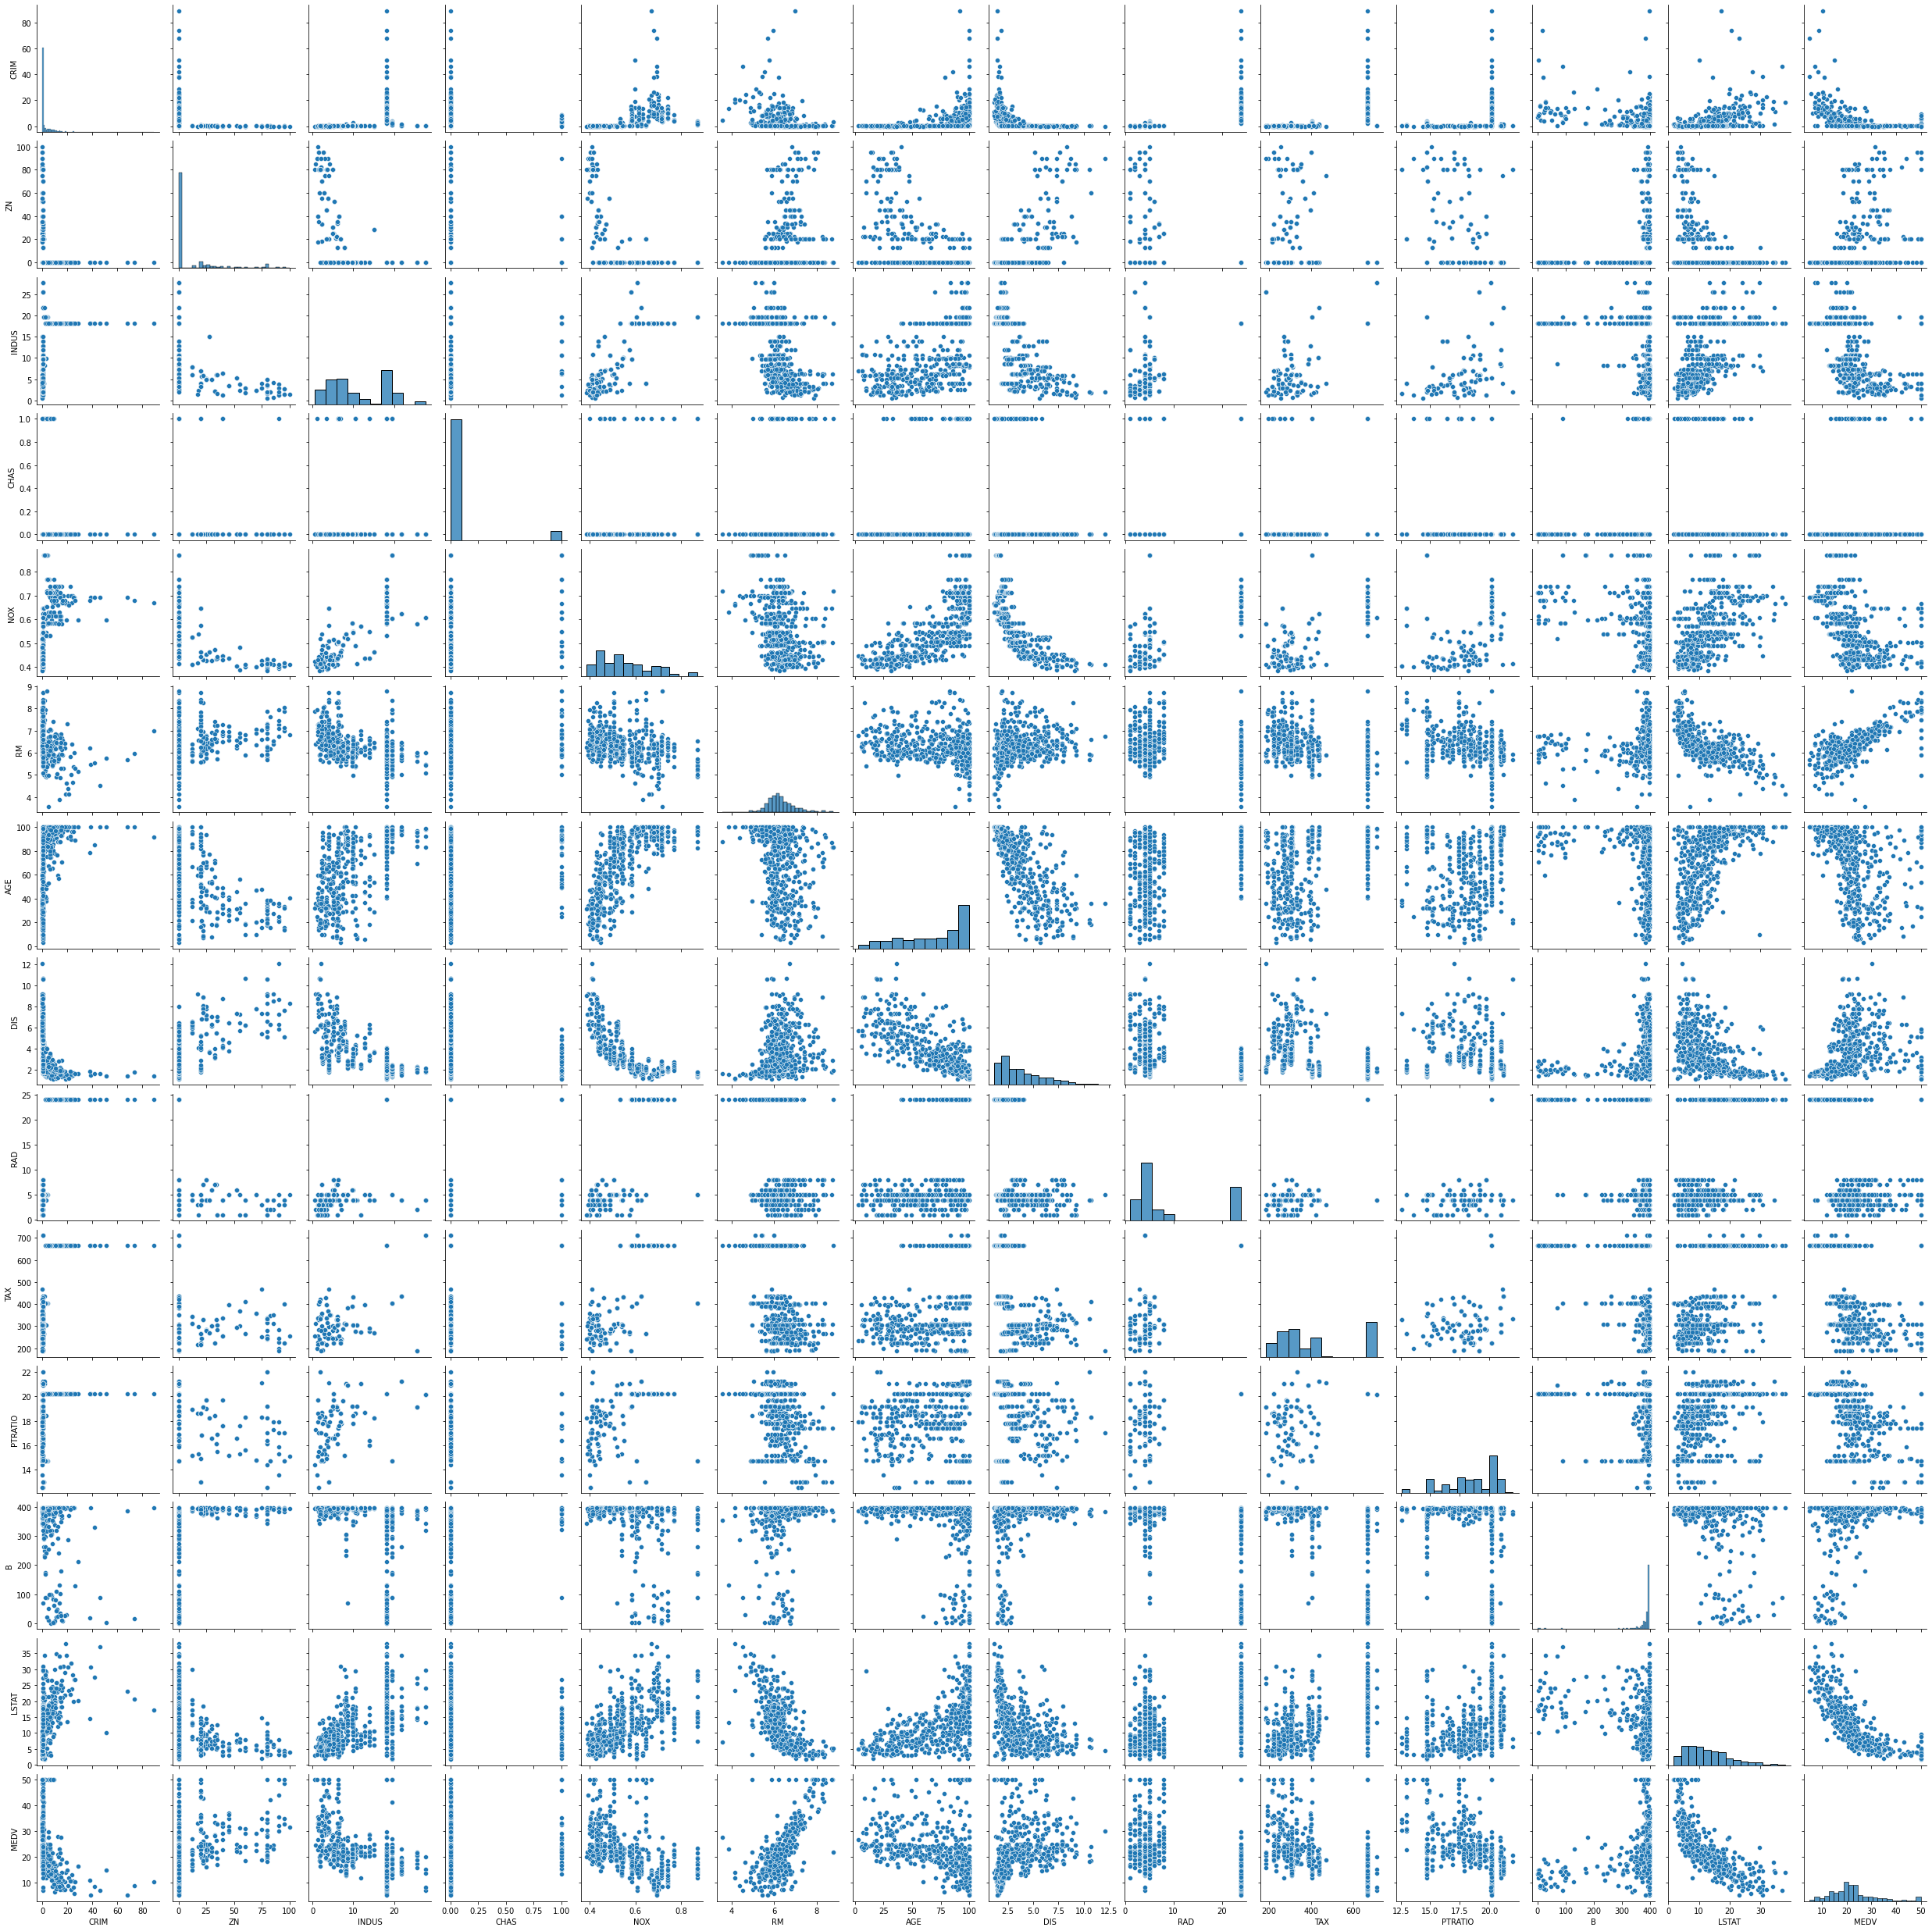

In [16]:
# Check Relation
sns.pairplot(data=df)
plt.show()

- Its very tough to analysis this large visualization
- Its recommended, to take small amount of data & analysis over that
- Understanding full at a time, pretty difficult
- In case of same column, its shows distribution
- Crime-Crime: Crime rate is between 0-1
- Crime-MEDV: Negative Rel, house price is higher when less crime
- This insights basically provided by Data Analyst, font-end, but ML Engineer need to have some idea over this

In [17]:
# Check & Verify Correlation
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


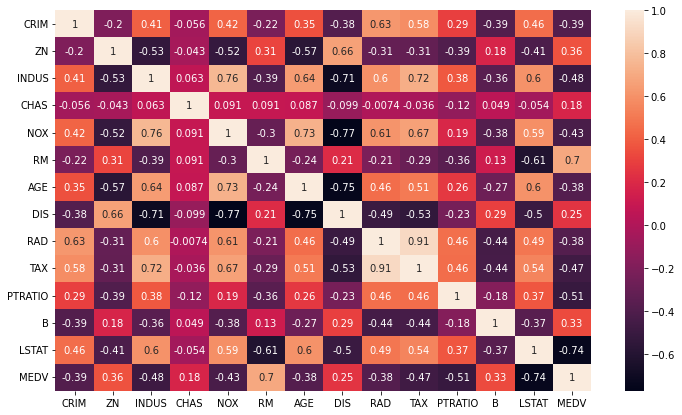

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(corr, annot=True) # annot add corr value
plt.show()

#### Observations

- Corr Range: 0-1
- Black : Negatively correlated
- Read : Mediam Corr/ Close to 0
- White: Strongly Correlated / Highly correlated 
- Here, RM (No of Rooms) is comperatively linearly correlated with target e.g MEDV, then ZN, Chas

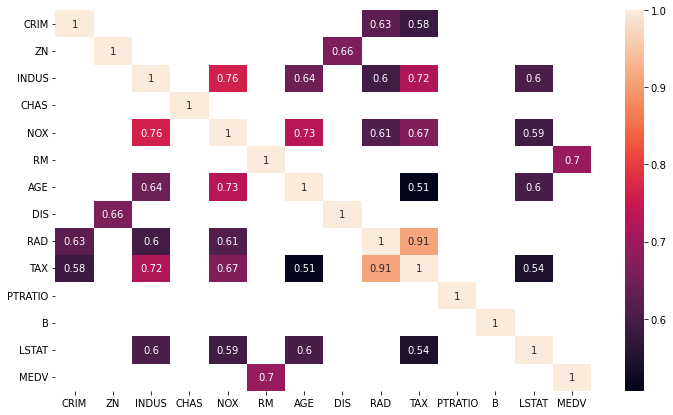

In [19]:
# Filtering Correlation: All Cols when > 0.5
plt.figure(figsize=(12,7))
sns.heatmap(corr[corr > 0.5], annot=True) # annot add corr value
plt.show()

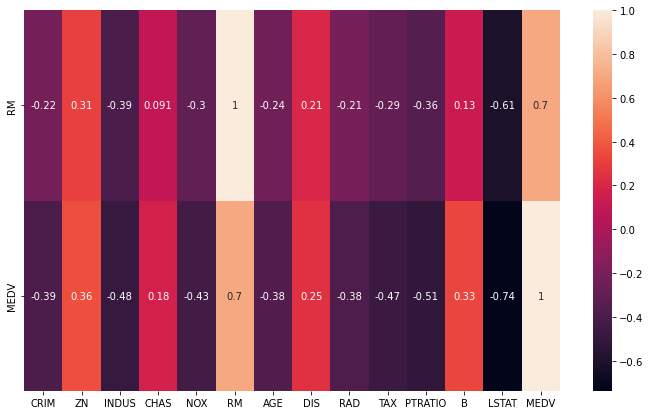

In [20]:
# Filtering Correlation: when corr > 0.5 respect to target e.g MEDV only
plt.figure(figsize=(12,7))
sns.heatmap(corr[corr['MEDV']>0.5], annot=True)
plt.show()

- Visualize the Relationship (RM vs MEDV)  x:rm; y:MEDV | Check with best/strongly correlated features (RM)
- First checking patter(reletionship), if no corrleation/patter, then its not possible to fit any model (e.g Regression)

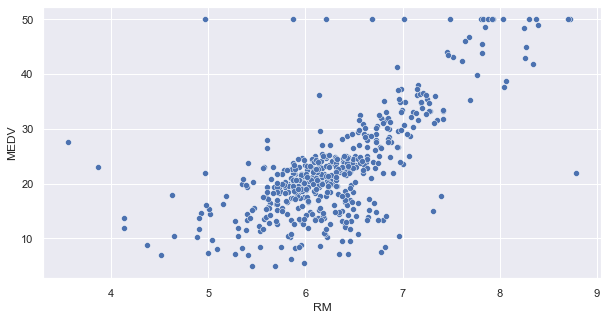

In [21]:
# Visualize the Relationship (target vs best found feature e.g RM)
plt.figure(figsize=(10,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=df, x='RM', y='MEDV')
plt.show()

- Observations:
- When no of rooms increases price increases
- There are some outliers spread scatterly, We need to detect & handling these outliers

### Handling Outliers

- Remove outliers from features first, so ultimately there is chance of removal outliers from target (MEDV) also, becasue of correlation between them
- Outliers: Extreame values, out of inter-quartile range 

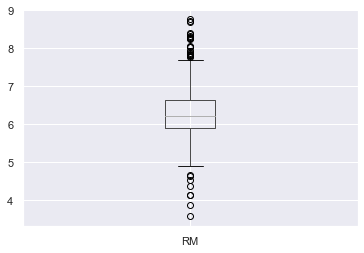

In [22]:
# Finding Outliers
df[['RM']].boxplot()
plt.show()

In [23]:
# Find IQR
qt3 = np.quantile(df.RM, 0.75)  # Return the values close to 75% quantile
qt1 = np.quantile(df.RM, 0.25)

iqr = qt3 - qt1  # Inter Quartile Range

In [24]:
df['RM'] > qt3 + iqr * 1.5  # Return boolen (whether outlier or not, True: Outliers) , if < qt3 = Actual values

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: RM, Length: 506, dtype: bool

In [25]:
df[df['RM'] > qt3 + iqr * 1.5] # Return outlier index for all features/ column, we need for RM only, > qt3 = Outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.000000,3.4952,2.0,276.0,18.000000,396.899994,4.21,38.700001
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.900002,3.4952,2.0,276.0,18.000000,393.529999,3.57,43.799999
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.199997,2.0407,5.0,403.0,14.700000,389.609985,1.92,50.000000
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.900002,2.1620,5.0,403.0,14.700000,388.450012,3.32,50.000000
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.199997,2.0459,5.0,403.0,14.700000,369.299988,3.70,50.000000
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.300003,2.7410,3.0,193.0,17.799999,395.559998,7.56,39.799999
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.599998,3.1992,3.0,193.0,17.799999,392.630005,4.45,50.000000
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.000000,5.6484,4.0,255.0,14.400000,394.230011,2.97,50.000000
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.200001,5.1180,4.0,224.0,14.700000,392.779999,3.81,48.500000
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.900000,5.1180,4.0,224.0,14.700000,390.549988,2.88,50.000000


In [26]:
# Outlier index(upper & lower bound) find for removal:
upper_bound = df[df['RM'] > qt3 + iqr * 1.5].index   # mqx extram outlier index, taking higher from qt3/ upward
lower_bound = df[df['RM'] < qt1 - iqr * 1.5].index   # min extram outlier index, taking below from qt1 / downward

# Index Values 
print(upper_bound)
print(lower_bound)

Int64Index([ 97,  98, 162, 163, 166, 180, 186, 195, 203, 204, 224, 225, 226,
            232, 233, 253, 257, 262, 267, 280, 283, 364],
           dtype='int64')
Int64Index([365, 367, 374, 384, 386, 406, 412, 414], dtype='int64')


## Update Data Frame - with processed data ( Excluding outliers)

- Dont update in original data
- Create/ copy a new data frame with required features & target & do operation on this customed new data

In [27]:
# Create New Data
rm_medv = df[['RM', 'MEDV']].copy()   # create a new df with best feature & corresponding target
rm_medv

# actions:
# now df is to be replaced in getting "outliers index" or rm_medv need to apply in outlier index getting operation

,RM,MEDV
0,6.575,24.000000
1,6.421,21.600000
2,7.185,34.700001
3,6.998,33.400002
4,7.147,36.200001
...,...,...
501,6.593,22.400000
502,6.120,20.600000
503,6.976,23.900000
504,6.794,22.000000


In [28]:
# Outlier index(upper & lower bound) find for removal: Update with new df (rm_medv)
upper_bound = rm_medv[rm_medv['RM'] > qt3 + iqr * 1.5].index   
lower_bound = rm_medv[rm_medv['RM'] < qt1 - iqr * 1.5].index

# Index Values
print(upper_bound)
print(lower_bound)

Int64Index([ 97,  98, 162, 163, 166, 180, 186, 195, 203, 204, 224, 225, 226,
            232, 233, 253, 257, 262, 267, 280, 283, 364],
           dtype='int64')
Int64Index([365, 367, 374, 384, 386, 406, 412, 414], dtype='int64')


### Dropping Outliers

<AxesSubplot:>

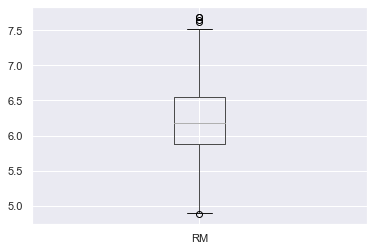

In [29]:
# Drop Outlier & update in new df (rm_medv)
rm_medv.drop(upper_bound, inplace=True)
rm_medv.drop(lower_bound, inplace=True)

# Check & Verify outliers- after treamment
rm_medv[['RM']].boxplot()

- Still there are some outliers, since we takes 1.5 time only

## Re-Visualization ( When outliers Removed)

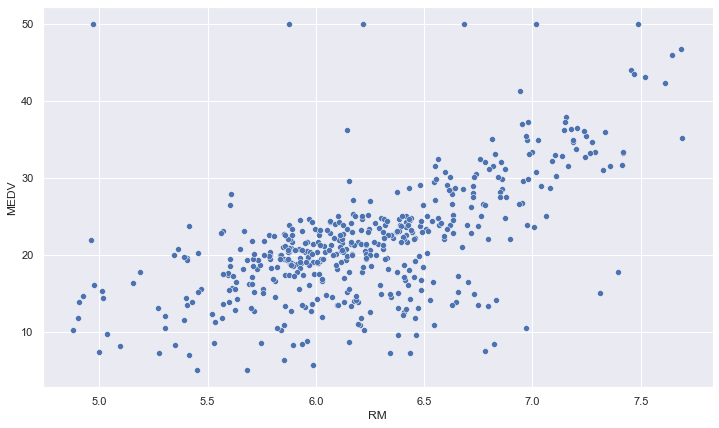

In [30]:
# Scatterplot
plt.figure(figsize=(12,7))
sns.set_theme(style='darkgrid')
sns.scatterplot(data=rm_medv, x='RM', y='MEDV')
plt.show()

- Features selection already processed inside EDA, that why we understand out best feature is "RM"

## Feature Engineering & Selection

In [31]:
x = rm_medv[['RM']]  # feature always denonted by x & its always in 2D form
y = rm_medv['MEDV']  # Target alwasy denoted by y and its always in 1D form

## Train Test- Split

##### Split Data for Train & Test

In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25, random_state=42)

In [33]:
xtrain

,RM
454,6.728
249,6.718
265,5.560
353,6.728
134,5.757
...,...
108,6.474
291,7.148
372,5.875
465,5.759


In [34]:
ytrain

454    14.900000
249    26.200001
265    22.799999
353    30.100000
134    15.600000
         ...    
108    19.799999
291    37.299999
372    50.000000
465    19.900000
104    20.100000
Name: MEDV, Length: 357, dtype: float32

In [35]:
# Len for (xtrain, ytrain) and (xtest, ytest) must be same
print(len(xtrain))
print(len(ytrain))

357
357


In [36]:
# Len for (xtrain, ytrain) and (xtest, ytest) must be same
print(len(xtest))
print(len(ytest))

119
119


In [37]:
# Check & Verify the ratio of Train & Test Data
print(f"Train Data : {357/506}")
print(f"Test Data : {119/506}")

Train Data : 0.7055335968379447
Test Data : 0.23517786561264822


In [38]:
# additional check
ytrain, ytest

(454    14.900000
 249    26.200001
 265    22.799999
 353    30.100000
 134    15.600000
          ...    
 108    19.799999
 291    37.299999
 372    50.000000
 465    19.900000
 104    20.100000
 Name: MEDV, Length: 357, dtype: float32,
 497    18.299999
 33     13.100000
 133    18.400000
 72     22.799999
 78     21.200001
          ...    
 66     19.400000
 491    13.600000
 86     22.500000
 31     14.500000
 84     23.900000
 Name: MEDV, Length: 119, dtype: float32)

# Modeling

### Scratch Modeling

#### Raw Implemenation - Equation1 

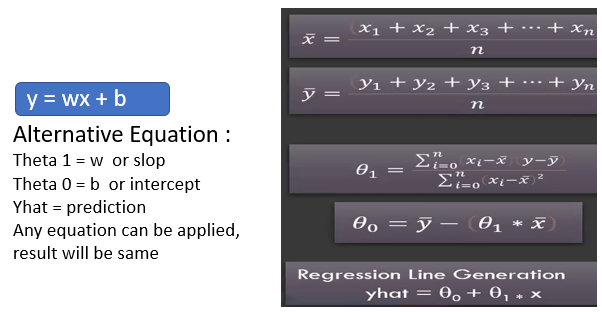

#### Raw Implemenation - Equation2

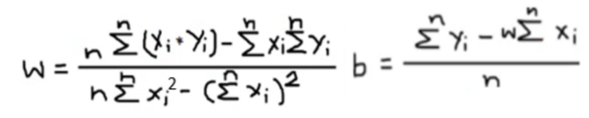

- x1 = xtrain (rm)
- ytrain = correponding target value of xtrain
- y1 = ytrain

##### Calculation W or Coefficient

In [39]:
w = (np.sum(xtrain['RM'] * ytrain) - (xtrain['RM'].mean()*ytrain.mean()))/(np.sum(xtrain['RM']**2) - (xtrain['RM'].sum()**2))
b = ytrain.mean() - (w*xtrain['RM'].mean())
yhat = lambda w,b,x: w*x + b

In [40]:
print(w)
print(b)

-0.009901394810468521
21.649590948323503


In [41]:
yhat(w, b, 6.728)

21.58297436403867

##### Calculation W or Coefficient

In [42]:
w = (np.sum(xtrain['RM'] * ytrain) - (xtrain['RM'].sum()*ytrain.sum()))/(np.sum(xtrain['RM']**2) - (xtrain['RM'].sum()**2))
b = ytrain.mean() - (w*xtrain['RM'].mean())  # from equation 1
yhat = lambda w,b,x: w*x + b

In [43]:
print(w) # Coef
print(b) # intercept

3.467982219328088
0.0006845268008923711


In [44]:
yhat(w, b, 6.728)

23.333268898440267

### Modeling - Scikit Learn

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
# Fit / Train the model
model.fit(xtrain, ytrain) # fit means model calculating w & b

LinearRegression()

In [47]:
b = model.intercept_  
b

-32.795715

In [48]:
w = model.coef_   # Slope 
w

array([8.736711], dtype=float32)

### Prediction

In [49]:
# Prediction on Full Data
yhat = (w * x) + b 
yhat

,RM
0,24.648155
1,23.302704
2,29.977551
3,28.343788
4,29.645554
...,...
501,24.805416
502,20.672951
503,28.151577
504,26.561497


In [50]:
# Prediction for given randon input value e.g x= 6.72
yhat = (w * 6.72) + b   
yhat

array([25.914978], dtype=float32)

In [51]:
# Prediction on Train data
model.predict(xtrain)  
# Return prediction as per shape of xtrain (357)

array([25.984875 , 25.897507 , 15.7803955, 25.984875 , 17.501526 ,
       21.799988 , 16.365753 , 21.389366 , 13.936951 , 29.71545  ,
       21.240837 , 13.893265 , 21.817463 , 23.905533 , 23.381332 ,
       18.506252 , 16.846275 , 19.05666  , 21.083576 , 14.050526 ,
       28.343788 , 16.278389 , 17.36174  , 18.864456 , 23.390072 ,
       25.748985 , 25.513088 , 10.651947 , 20.69043  , 17.990784 ,
       21.127262 , 24.10648  , 21.328209 , 24.324898 , 14.618412 ,
       18.488773 , 21.162209 , 31.794785 , 20.52443  , 19.0654   ,
       22.9445   , 22.394085 , 21.45052  , 29.540718 , 23.346386 ,
       24.211323 , 14.976616 , 10.066589 , 18.558666 , 15.859024 ,
       23.259018 , 21.441784 , 18.200462 , 20.375904 , 25.871296 ,
       31.488998 , 10.241322 , 27.985577 , 20.751587 , 21.039898 ,
       20.568111 , 21.083576 , 19.676968 , 18.53246  , 25.17236  ,
       20.952526 , 22.009666 , 18.925613 , 21.625256 , 21.45052  ,
       19.659496 , 24.560791 , 19.982754 , 23.058075 , 20.6030

In [52]:
# Prediction on by test data, return 119 prediciton as per shape
model.predict(xtest) 

array([17.824787, 17.012272, 18.069412, 20.192436, 21.651463, 18.995506,
       25.548038, 29.916393, 28.081684, 19.659496, 24.342373, 19.4935  ,
       23.949219, 19.47602 , 22.263035, 17.117111, 17.117111, 20.82148 ,
       23.171654, 26.456657, 28.081684, 32.467514, 22.376614, 23.154179,
       24.648155, 28.501045, 19.703178, 21.467995, 13.543797, 18.672245,
       21.633991, 29.97755 , 26.168346, 22.883343, 30.536701, 22.752289,
       14.871777, 22.90955 , 13.264221, 22.123245, 24.822887, 23.6347  ,
       20.882633, 19.86044 , 18.523724, 26.90223 , 16.549225, 23.267754,
       23.07555 , 31.218163, 17.07343 , 22.062088, 30.466808, 21.039898,
       22.900814, 27.138119, 21.765041, 19.0654  , 14.295155, 27.461376,
       20.94379 , 20.847687, 26.281921, 28.719463, 20.952526, 18.471302,
       23.267754, 22.621239, 21.817463, 23.433754, 20.611797, 24.805416,
       11.700352, 18.611088, 21.240837, 18.174255, 20.620533, 23.162918,
       17.23943 , 22.350399, 20.140015, 22.970707, 

In [53]:
xtest.shape

(119, 1)

##### Error Calculation

In [54]:
# Error : Prediction - Actual  
model.predict(xtrain) - ytrain

454    11.084875
249    -0.302494
265    -7.019604
353    -4.115126
134     1.901525
         ...    
108     3.965748
291    -7.645710
372   -31.467541
465    -2.380999
104     0.983576
Name: MEDV, Length: 357, dtype: float32

- In error, there are some negative, so need to "square" & take "absolute value" to get total errors

In [55]:
# Squre Error
(model.predict(xtrain) - ytrain)**2  

454    122.874458
249      0.091503
265     49.274837
353     16.934259
134      3.615799
          ...    
108     15.727156
291     58.456882
372    990.206116
465      5.669154
104      0.967421
Name: MEDV, Length: 357, dtype: float32

In [56]:
# Total Error/ Squared Error - Summation
((model.predict(xtrain) - ytrain)**2).sum()  

13956.024

In [57]:
# Means Squared Error : MSE
((model.predict(xtrain) - ytrain)**2).sum()/ 357.0  

39.092505361519606

In [58]:
# Keep the prediction values in a variables
ypred = model.predict(xtrain) 

## Evaluation / Testing

In [59]:
# Import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
# Error: Actual target - Predicted Target    # Return mean absolute error, use following one as recommended approach always
mean_absolute_error(ytrain, ypred)

4.1923738

In [61]:
# Mean Absolute Error : Actual target - Predicted Targe | Recommonded approach useing key & values
mean_absolute_error(y_true=ytrain, y_pred=ypred)

4.1923738

In [62]:
# Mean Squared Error 
mean_squared_error(y_true=ytrain, y_pred=ypred)

39.092506

In [63]:
# R2_Score, Return accuracy rate of model perforamce e.g here model is around 36% accurate 
r2_score(y_true=ytrain, y_pred=ypred)

0.3652214579162092

#### Dummy Values Creation

- These dummies required for following model visualization
- This is one kind of Sampling
- Re prediction on dummpy variables & compare with actual data

In [64]:
# Step1: See the range before dummy generation
# This range can also be verified in x axis (following model Visualization)
xtrain.describe()

,RM
count,357.000000
mean,6.224736
std,0.543594
min,4.880000
25%,5.879000
50%,6.172000
75%,6.552000
max,7.691000


In [65]:
# Step 2: Dummy Generation as per range
dummy_rm = np.linspace(4, 8, 200)  # it returns a np array, which generate 200 values with a range (4,8)
dummy_rm

array([4.        , 4.0201005 , 4.04020101, 4.06030151, 4.08040201,
       4.10050251, 4.12060302, 4.14070352, 4.16080402, 4.18090452,
       4.20100503, 4.22110553, 4.24120603, 4.26130653, 4.28140704,
       4.30150754, 4.32160804, 4.34170854, 4.36180905, 4.38190955,
       4.40201005, 4.42211055, 4.44221106, 4.46231156, 4.48241206,
       4.50251256, 4.52261307, 4.54271357, 4.56281407, 4.58291457,
       4.60301508, 4.62311558, 4.64321608, 4.66331658, 4.68341709,
       4.70351759, 4.72361809, 4.74371859, 4.7638191 , 4.7839196 ,
       4.8040201 , 4.8241206 , 4.84422111, 4.86432161, 4.88442211,
       4.90452261, 4.92462312, 4.94472362, 4.96482412, 4.98492462,
       5.00502513, 5.02512563, 5.04522613, 5.06532663, 5.08542714,
       5.10552764, 5.12562814, 5.14572864, 5.16582915, 5.18592965,
       5.20603015, 5.22613065, 5.24623116, 5.26633166, 5.28643216,
       5.30653266, 5.32663317, 5.34673367, 5.36683417, 5.38693467,
       5.40703518, 5.42713568, 5.44723618, 5.46733668, 5.48743

In [66]:
# Check the Shape, comman sampling
dummy_rm.shape

(200,)

In [67]:
# Reshape for Machine Readability
dummy_rm.reshape(10, 20) # Row, Col : 10, 20 [Reshape 10x21, not possible, because tatal element is 200, so 10x20]

array([[4.        , 4.0201005 , 4.04020101, 4.06030151, 4.08040201,
        4.10050251, 4.12060302, 4.14070352, 4.16080402, 4.18090452,
        4.20100503, 4.22110553, 4.24120603, 4.26130653, 4.28140704,
        4.30150754, 4.32160804, 4.34170854, 4.36180905, 4.38190955],
       [4.40201005, 4.42211055, 4.44221106, 4.46231156, 4.48241206,
        4.50251256, 4.52261307, 4.54271357, 4.56281407, 4.58291457,
        4.60301508, 4.62311558, 4.64321608, 4.66331658, 4.68341709,
        4.70351759, 4.72361809, 4.74371859, 4.7638191 , 4.7839196 ],
       [4.8040201 , 4.8241206 , 4.84422111, 4.86432161, 4.88442211,
        4.90452261, 4.92462312, 4.94472362, 4.96482412, 4.98492462,
        5.00502513, 5.02512563, 5.04522613, 5.06532663, 5.08542714,
        5.10552764, 5.12562814, 5.14572864, 5.16582915, 5.18592965],
       [5.20603015, 5.22613065, 5.24623116, 5.26633166, 5.28643216,
        5.30653266, 5.32663317, 5.34673367, 5.36683417, 5.38693467,
        5.40703518, 5.42713568, 5.44723618, 5

In [68]:
# Reshape (Right Form) - We will follow this kind of reshaping, Feature must be in this form always, 2D form
dummy_rm.reshape(-1,1)

array([[4.        ],
       [4.0201005 ],
       [4.04020101],
       [4.06030151],
       [4.08040201],
       [4.10050251],
       [4.12060302],
       [4.14070352],
       [4.16080402],
       [4.18090452],
       [4.20100503],
       [4.22110553],
       [4.24120603],
       [4.26130653],
       [4.28140704],
       [4.30150754],
       [4.32160804],
       [4.34170854],
       [4.36180905],
       [4.38190955],
       [4.40201005],
       [4.42211055],
       [4.44221106],
       [4.46231156],
       [4.48241206],
       [4.50251256],
       [4.52261307],
       [4.54271357],
       [4.56281407],
       [4.58291457],
       [4.60301508],
       [4.62311558],
       [4.64321608],
       [4.66331658],
       [4.68341709],
       [4.70351759],
       [4.72361809],
       [4.74371859],
       [4.7638191 ],
       [4.7839196 ],
       [4.8040201 ],
       [4.8241206 ],
       [4.84422111],
       [4.86432161],
       [4.88442211],
       [4.90452261],
       [4.92462312],
       [4.944

### Prediction on New/Dummy Values:

In [69]:
# Prediction by dummpy data
dummy_rm = np.linspace(4, 8, 200)
dummy_rm = dummy_rm.reshape(-1,1)  # reshape is mendatory, feature must be in 2D
pred = model.predict(dummy_rm)     # target/ prediction/output can be in 1D form or normal array
pred

# Tasks:
# 1. Now we will compare the actual value with these prediciton values (visualization)

array([ 2.15112686,  2.32673913,  2.50235141,  2.67796368,  2.85357595,
        3.02918822,  3.2048005 ,  3.38041277,  3.55602504,  3.73163731,
        3.90724958,  4.08286186,  4.25847413,  4.4340864 ,  4.60969867,
        4.78531095,  4.96092322,  5.13653549,  5.31214776,  5.48776004,
        5.66337231,  5.83898458,  6.01459685,  6.19020913,  6.3658214 ,
        6.54143367,  6.71704594,  6.89265821,  7.06827049,  7.24388276,
        7.41949503,  7.5951073 ,  7.77071958,  7.94633185,  8.12194412,
        8.29755639,  8.47316867,  8.64878094,  8.82439321,  9.00000548,
        9.17561775,  9.35123003,  9.5268423 ,  9.70245457,  9.87806684,
       10.05367912, 10.22929139, 10.40490366, 10.58051593, 10.75612821,
       10.93174048, 11.10735275, 11.28296502, 11.4585773 , 11.63418957,
       11.80980184, 11.98541411, 12.16102638, 12.33663866, 12.51225093,
       12.6878632 , 12.86347547, 13.03908775, 13.21470002, 13.39031229,
       13.56592456, 13.74153684, 13.91714911, 14.09276138, 14.26

# Model Visualization

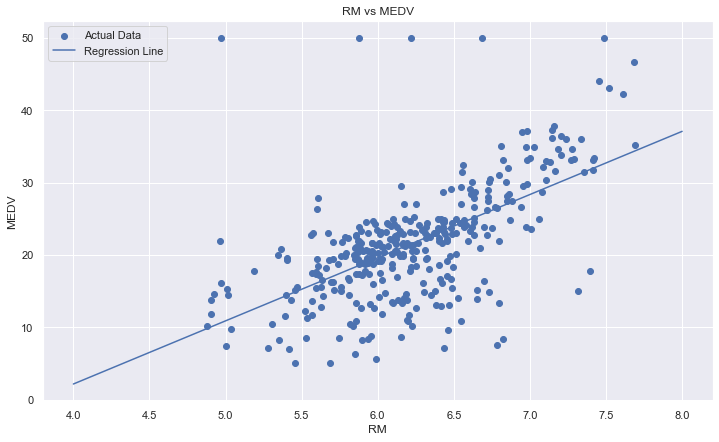

In [70]:
# Model Visualization on Train Data
plt.figure(figsize=(12,7))
plt.scatter(xtrain['RM'], ytrain, label='Actual Data') # label need to combided with legend
plt.plot(dummy_rm.ravel(), pred, label='Regression Line') # Ravel convert data to its original form
plt.title("RM vs MEDV")
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

- The regression line, actully predicting the values

# Multiple Linear Regression

In [71]:
from sklearn.feature_selection import mutual_info_regression
features = df.drop(columns=['MEDV']) # Features e.g x; pass a list
target = df.MEDV                     # target e.g y
scores = mutual_info_regression(features, target, random_state=42)  # x= features , y = target

- It returns scores for selective features (those have higher dependency on target)
- The feature having higher scores, that will help better for good predictions

In [72]:
# Scores 
scores = pd.DataFrame(scores)   # Data Frame Conversion (scores)
scores.columns = ['Score']      # Give a column name for Scores
scores.index = features.columns # Feature name replaced to feature index 
scores.sort_values(by='Score', ascending=False, inplace=True) # Sort for better visualization
scores

,Score
LSTAT,0.692196
INDUS,0.556433
RM,0.553450
PTRATIO,0.530185
NOX,0.500531
CRIM,0.452704
TAX,0.440250
RAD,0.366602
ZN,0.352496
AGE,0.342549


- By the Scores we can find out the best scores ( dependency over target) and fit the model accordingly / Manually
- But, there is method "SelectKBest" is very effective when lost of features and its difficult to select best ones
- SelectKBest optimize the feature selection process or its a method/technique for optimizing feature selection process

In [73]:
# Feature Selection by "SelectKBest" Method
from sklearn.feature_selection import SelectKBest
top_features = SelectKBest(mutual_info_regression, k=2) # Asked to take 2 best features
top_features.fit(features,target )  # Train the features & target
top_features.get_feature_names_out() # best features

array(['RM', 'LSTAT'], dtype=object)

In [74]:
# Variable Declaration
x = features[top_features.get_feature_names_out()] # features are the list form
y = target  # target is constant

## Train & Test - Spliting

In [75]:
# Train Test
xtrain, xtest, ytrain, ytest = train_test_split (
    x, y, test_size = 0.25, random_state=42
)

# Model & train, this model will work with best seleted feature(select by SelectKBest)
model2 = LinearRegression()
model2.fit(xtrain, ytrain)

LinearRegression()

### Prediction

In [76]:
ypred = model2.predict(xtest)
ypred

array([25.648623  , 31.026052  , 17.508125  , 26.080935  , 19.682821  ,
       23.025684  , 16.97563   , 14.565102  , 22.178251  , 20.166052  ,
       17.436678  , 18.248041  , -2.4775848 , 22.537848  , 20.163874  ,
       26.923277  , 17.277548  ,  3.5513802 , 37.279457  , 18.534395  ,
       26.309698  , 27.196632  , 13.146029  , 26.173338  , 19.166681  ,
       14.530821  , 22.751629  , 21.021536  , 17.905752  , 19.086584  ,
       17.533237  , 26.89485   , 27.52468   , 19.344734  , 15.505514  ,
       17.542162  , 32.953392  , 22.271215  , 20.147112  , 25.71986   ,
       12.389798  , 28.911364  , 38.176277  , 18.687067  , 25.80308   ,
       16.707052  , 15.839464  , 27.158733  , 19.63297   , 29.120531  ,
       20.758692  , 31.445868  , 17.924952  , 28.461977  , 35.02057   ,
       24.101307  , 19.712584  , 31.69892   , 25.130035  , 15.2618885 ,
       27.174776  , 32.784935  , 29.790586  , 18.867458  , 28.810818  ,
       10.882387  , 20.697655  , 26.552319  , 29.654093  , 16.86

## Evaluation/ Accuracy

In [77]:
# Mean Squared Error: MSE
mse = mean_squared_error (y_true = ytest, y_pred = ypred) # Q. Why y_test, since we are predicing on test (xtest) data
mae = mean_absolute_error (y_true = ytest, y_pred = ypred)
r2_score_fn = r2_score(y_true = ytest, y_pred=ypred)

print(f"MSE : {mse}")   # previous : 39.
print(f"MAE : {mae}")   # previous : 3.9
print(f"R2_Score :{r2_score_fn}")  # previous : .36 ; the more the better!

MSE : 29.54566764831543
MAE : 3.957263231277466
R2_Score :0.57808269285418


- Overall Model Performance is improved !

# Cross Validation

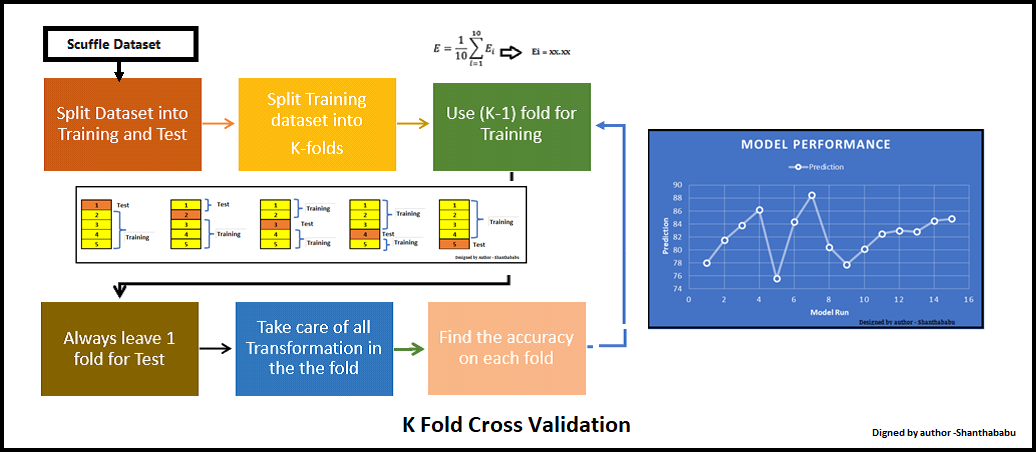

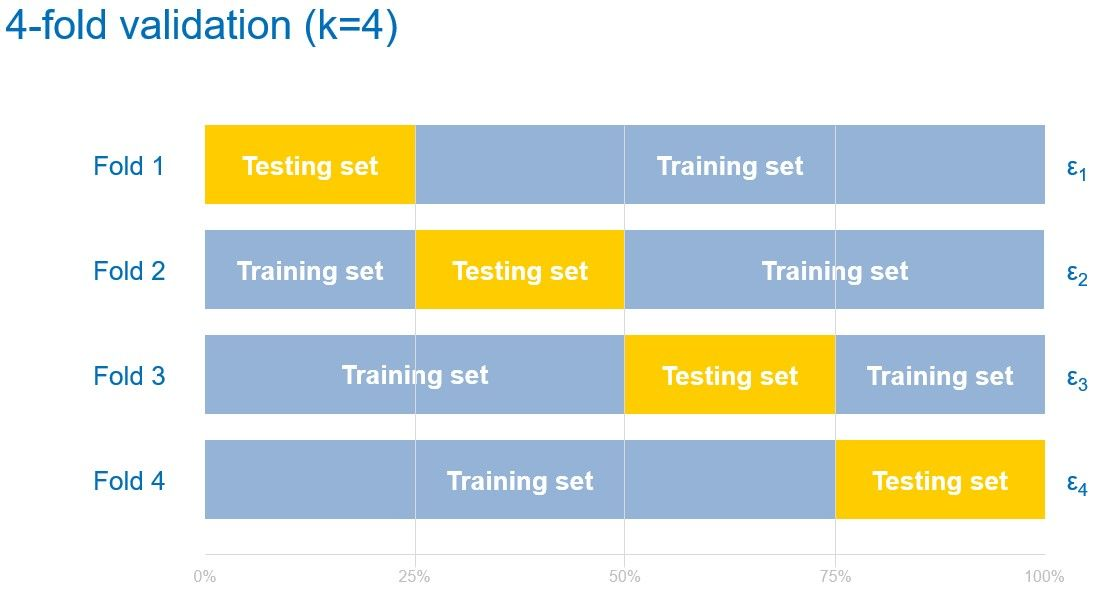

- Cross validation is the model traing process for which it takes both of train & test data
- Training the model by switching the train & test data spliting (folds)
- Model will learn from train & testing data both e.g Train full data & testing full data as well by different iterations
- To know the performance of overall data
- Kfolds: default folds no 5, we can change over this
- will do some shuffling

In [78]:
# Import Package - KFold
from sklearn.model_selection import KFold
folds = KFold(n_splits=6, shuffle=True, random_state=42) # n_splits = no of folds that we want
for train_idx, test_idx in folds.split(x):  # for fetching data from index number
    # Data Fetching/ Extraction
    xtrain = x.iloc[train_idx] # value extraction from idx number
    ytrain = y.iloc[train_idx]
    xtest = x.iloc[test_idx]
    ytest = y.iloc[test_idx]
    
    # Modeling
    model3 = LinearRegression() 
    model3.fit(xtrain, ytrain) 
    ypred = model3.predict(xtest) # prediction applied on test dat
    
    # Evaluation
    print('MSE: ', mean_squared_error(y_true=ytest, y_pred= ypred))
    print('MAE: ', mean_absolute_error(y_true=ytest, y_pred=ypred))
    print('R2_Score: ', r2_score(y_true=ytest, y_pred=ypred))


MSE:  20.160654
MAE:  3.4957042
R2_Score:  0.7227306207604285
MSE:  37.69784
MAE:  4.502774
R2_Score:  0.5112331769532539
MSE:  38.860874
MAE:  4.0164423
R2_Score:  0.5720958658641647
MSE:  31.534006
MAE:  4.059301
R2_Score:  0.6854300216510558
MSE:  27.512142
MAE:  4.1339087
R2_Score:  0.7035655485200032
MSE:  29.857983
MAE:  3.6379583
R2_Score:  0.5641823245499176


In [84]:
# Average Score / Average Model Perforamcen
from sklearn.model_selection import cross_val_score 
cv = cross_val_score(model3, x, y, cv=6) # it returns R2_score by default
cv
# Observation:
# cross_val_score: its return only one score (e.g r2 score) that can be a problem

array([ 0.61353337,  0.67851739,  0.48169208,  0.60419396, -0.0014579 ,
       -0.27906953])

In [85]:
cv.mean()

0.34956823075525567

In [79]:
# Return data/value as per its index number/position/location (train_idx)- Just for verification
x.iloc[train_idx]

,RM,LSTAT
0,6.575,4.98
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
5,6.430,5.21
...,...,...
499,5.569,15.10
500,6.027,14.33
501,6.593,9.67
503,6.976,5.64


In [80]:
# data from test_index/ data fetching process - for verification
y.iloc[train_idx]

0      24.000000
2      34.700001
3      33.400002
4      36.200001
5      28.700001
         ...    
499    17.500000
500    16.799999
501    22.400000
503    23.900000
504    22.000000
Name: MEDV, Length: 422, dtype: float32

### Example of Reshape

##### Reshape

In [81]:
a = np.array([[1,2,3,4], [5,6,7,8]])  # 2D Array
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [82]:
a.reshape(-1)                # 1D Array

array([1, 2, 3, 4, 5, 6, 7, 8])

In [83]:
a.reshape(-1,1)  # 1D Array, Model Expectation

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

#### Reference 

- https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape